In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [32]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [45]:
# Find the most recent date in the data set.

# The below code was used to find the column names, but is not required for the outcome
# inspector = inspect(engine)
# columns = inspector.get_columns('measurement')

# for c in columns:
#     print(c['name'], c["type"])

session.query(Measurement.date).order_by(desc(Measurement.date)).limit(10).all()

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


[('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-21')]

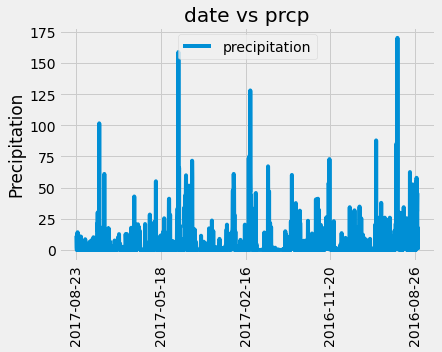

In [126]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database, calculate the date one year from
# the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
one_year = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date >= year_ago).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
year_df = pd.DataFrame(one_year)
year_df.set_index("date", inplace = True)
# Sort the dataframe by date
year_df.sort_values(by='date', ascending = False, inplace = True)
cleaned_df = year_df.dropna()
# Use Pandas Plotting with Matplotlib to plot the data
cleaned_df.plot(y='prcp',label="precipitation",title ="date vs prcp",rot = 90)
plt.ylabel("Precipitation")
plt.xlabel("")
plt.legend(loc="upper center")


In [106]:
# Use Pandas to calcualte the summary statistics for the precipitation data
agg_summary = cleaned_df.agg(['mean','median','var','std','sem'])
agg_summary


,prcp
mean,4.505888
median,0.500000
var,137.205772
std,11.713487
sem,0.260557



# Exploratory Station Analysis

In [107]:
# Design a query to calculate the total number stations in the dataset
engine.execute("SELECT count(station) FROM station").fetchall()


[(9,)]

In [133]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
station_count = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).all()
station_count

# Save the query results as a Pandas DataFrame and set the index to the date column
station_count_df = pd.DataFrame(station_count,columns=['Station', 'Count']).\
    sort_values('Count', ascending=False)
station_count_df

,Station,Count
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [144]:
# Using the most active station id from the previous query
all_USC00519281_query = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').all()
all_USC00519281_df = pd.DataFrame(all_USC00519281_query)
# Calculate the lowest, highest, and average temperature.
agg_summary = all_USC00519281_df.agg(['min','max','mean'])
agg_summary

,date,tobs
min,2010-01-01,12.200000
max,2017-08-18,29.400000
mean,NaN,22.035823


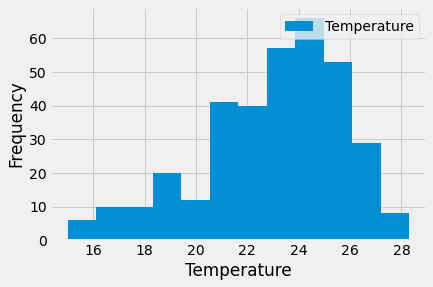

In [172]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
year_USC00519281_query = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').filter(Measurement.date >= year_ago).all()
year_USC00519281_df = pd.DataFrame(year_USC00519281_query)
# Set the index
year_USC00519281_df.set_index("date", inplace = True)
# Sort the dataframe by date & clean
year_USC00519281_df.sort_values(by='date', ascending = False, inplace = True)
cleaned_USC00519281_df = year_USC00519281_df.dropna()
cleaned_USC00519281_df
# Plot the results as a histogram
cleaned_USC00519281_df.plot(kind='hist',y='tobs',label="Temperature",bins=12)
plt.xlabel("Temperature")
plt.legend(loc="upper right")

# Close session

In [173]:
# Close Session
session.close()